In [98]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [99]:
#cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv("tweepy.csv")
df.head(5)

,text,sentiment
0,I dont think Trump understands that NFL owners...,0
1,Its not Trumps flag Its not Trumps anthem He w...,1
2,The Trump Administration has asked the Supreme...,0
3,Nigga said fuck the flag fuck Trump fuck the N...,1
4,If you think youre going to win hearts and min...,1


In [100]:
df.dtypes

text         object
sentiment     int64
dtype: object

In [101]:
df['sentiment'].value_counts()

0    45
1    35
Name: sentiment, dtype: int64

In [102]:
#df.drop(['id','date','query_string','user'],axis=1,inplace=True)

In [103]:
df[df['sentiment']==0].head(5)

,text,sentiment
0,I dont think Trump understands that NFL owners...,0
2,The Trump Administration has asked the Supreme...,0
5,Tom Brady chose not to come to the White House...,0
7,Stevie Wonder Shows Solidarity With NFL Stars ...,0
8,Folks affected by storm,0


In [104]:
df[df['sentiment']==4].head(5)

,text,sentiment


In [105]:
df[df['sentiment']==4].index

Int64Index([], dtype='int64')

In [106]:
df[df['sentiment']==0].index

Int64Index([ 0,  2,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
            21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 36, 39, 42, 45,
            48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78],
           dtype='int64')

In [107]:
df['sentiment'] = df['sentiment'].map({0:0, 4:1})

In [108]:
df['text'].head(75)

0     I dont think Trump understands that NFL owners...
1     Its not Trumps flag Its not Trumps anthem He w...
2     The Trump Administration has asked the Supreme...
3     Nigga said fuck the flag fuck Trump fuck the N...
4     If you think youre going to win hearts and min...
5     Tom Brady chose not to come to the White House...
6     You dont know either Trump posted it and I am ...
7     Stevie Wonder Shows Solidarity With NFL Stars ...
8                               Folks affected by storm
9     President Trump Sec Mattis and DOD should send...
10    If anyone is wondering why out of the blue Tru...
11    hope you ACT on that courage to vote despite T...
12    Why would they display their feelings for Trum...
13    Trump issues travel ban to bar or restrict vis...
14    Trump administration announces new travel rest...
15    The American flag is underwater in Puerto Rico...
16    Im thinking Trump picked  on the wrong group o...
17    I agree with President Trump that professi

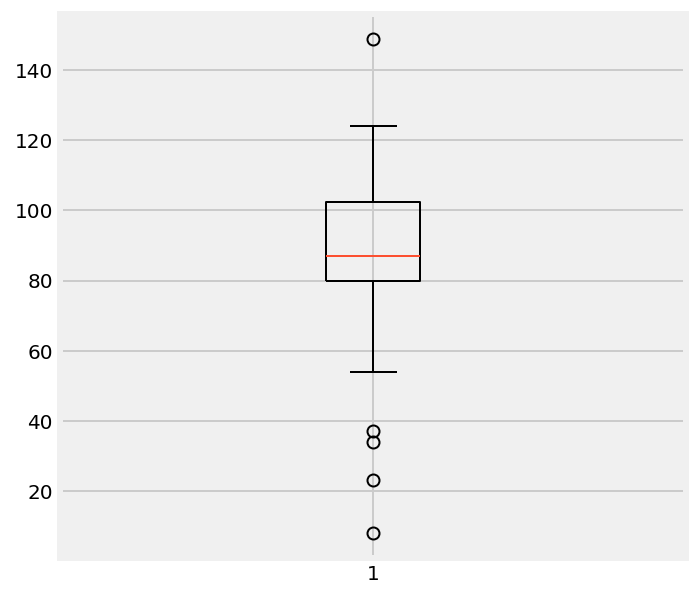

In [109]:
df['pre_clean_len'] = [len(t) for t in df.text]
from pprint import pprint
data_dict = {
    'sentiment':{
        'type':df.sentiment.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'text':{
        'type':df.text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [110]:
df['text'].head(20)

0     I dont think Trump understands that NFL owners...
1     Its not Trumps flag Its not Trumps anthem He w...
2     The Trump Administration has asked the Supreme...
3     Nigga said fuck the flag fuck Trump fuck the N...
4     If you think youre going to win hearts and min...
5     Tom Brady chose not to come to the White House...
6     You dont know either Trump posted it and I am ...
7     Stevie Wonder Shows Solidarity With NFL Stars ...
8                               Folks affected by storm
9     President Trump Sec Mattis and DOD should send...
10    If anyone is wondering why out of the blue Tru...
11    hope you ACT on that courage to vote despite T...
12    Why would they display their feelings for Trum...
13    Trump issues travel ban to bar or restrict vis...
14    Trump administration announces new travel rest...
15    The American flag is underwater in Puerto Rico...
16    Im thinking Trump picked  on the wrong group o...
17    I agree with President Trump that professi

In [111]:
df[df.pre_clean_len > 140].head(25)

,text,sentiment,pre_clean_len
35,Terry Bradshaw questions if Trump even underst...,NaN,149


In [112]:
df.dtypes

text              object
sentiment        float64
pre_clean_len      int64
dtype: object

# Data Cleansing

In [114]:
df['text'] = df['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

In [115]:
df['text'] = df['text'].replace(r'@[A-Za-z0-9]+', '', regex=True)

In [116]:
df.head(50)

,text,sentiment,pre_clean_len
0,I dont think Trump understands that NFL owners...,0.0,84
1,Its not Trumps flag Its not Trumps anthem He w...,NaN,85
2,The Trump Administration has asked the Supreme...,0.0,115
3,Nigga said fuck the flag fuck Trump fuck the N...,NaN,85
4,If you think youre going to win hearts and min...,NaN,120
5,Tom Brady chose not to come to the White House...,0.0,74
6,You dont know either Trump posted it and I am ...,NaN,90
7,Stevie Wonder Shows Solidarity With NFL Stars ...,0.0,80
8,Folks affected by storm,0.0,23
9,President Trump Sec Mattis and DOD should send...,0.0,111


In [117]:
df.head(50)

,text,sentiment,pre_clean_len
0,I dont think Trump understands that NFL owners...,0.0,84
1,Its not Trumps flag Its not Trumps anthem He w...,NaN,85
2,The Trump Administration has asked the Supreme...,0.0,115
3,Nigga said fuck the flag fuck Trump fuck the N...,NaN,85
4,If you think youre going to win hearts and min...,NaN,120
5,Tom Brady chose not to come to the White House...,0.0,74
6,You dont know either Trump posted it and I am ...,NaN,90
7,Stevie Wonder Shows Solidarity With NFL Stars ...,0.0,80
8,Folks affected by storm,0.0,23
9,President Trump Sec Mattis and DOD should send...,0.0,111


In [118]:
df['text'] = df['text'].map(lambda x : x.lower())

In [119]:
df['text'].head(5)

0    i dont think trump understands that nfl owners...
1    its not trumps flag its not trumps anthem he w...
2    the trump administration has asked the supreme...
3    nigga said fuck the flag fuck trump fuck the n...
4    if you think youre going to win hearts and min...
Name: text, dtype: object

In [120]:
df['text'] = df['text'].replace(r'[^\w\s]', '', regex=True)

In [121]:
df['text'].head(5)

0    i dont think trump understands that nfl owners...
1    its not trumps flag its not trumps anthem he w...
2    the trump administration has asked the supreme...
3    nigga said fuck the flag fuck trump fuck the n...
4    if you think youre going to win hearts and min...
Name: text, dtype: object

In [122]:
df.head(5)

,text,sentiment,pre_clean_len
0,i dont think trump understands that nfl owners...,0.0,84
1,its not trumps flag its not trumps anthem he w...,NaN,85
2,the trump administration has asked the supreme...,0.0,115
3,nigga said fuck the flag fuck trump fuck the n...,NaN,85
4,if you think youre going to win hearts and min...,NaN,120


In [123]:
df.drop(['pre_clean_len'], axis=1, inplace= True)

In [125]:
df.shape

(80, 2)

# Data Visualisation

In order for me to implement a couple of data visualisation in the next step, I need term frequency data. What kind of words are used in the tweets, and how many times it is used in entire corpus. I used count vectorizer to calculate the term frequencies, 
There are parameter options available for count vectorizer, such as removing stop words, limiting the maximum number of terms. However, in order to get a full picture of the dataset first, I implemented with stop words included, and not limiting the maximum number of terms

In [147]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [148]:
neg_doc_matrix = cvec.transform(df[df.sentiment == 0].text)
pos_doc_matrix = cvec.transform(df[df.sentiment  == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [149]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
the,40,0,40
trump,37,0,37
fuck,30,0,30
is,18,0,18
to,18,0,18
nfl,17,0,17
not,14,0,14
flag,12,0,12
on,11,0,11
ass,11,0,11


In [130]:

from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [131]:
document_matrix = cvec.transform(df.text)

In [132]:

neg_doc_matrix = cvec.transform(df[df.sentiment == 0].text)
pos_doc_matrix = cvec.transform(df[df.sentiment == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()


In [133]:
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
trump,37,0,37
fuck,30,0,30
nfl,17,0,17
flag,12,0,12
ass,11,0,11
nigga,10,0,10
gonna,10,0,10
lmaooo,10,0,10
said,10,0,10
beat,10,0,10


Text(0.5,1,'Top 50 tokens in negative tweets')

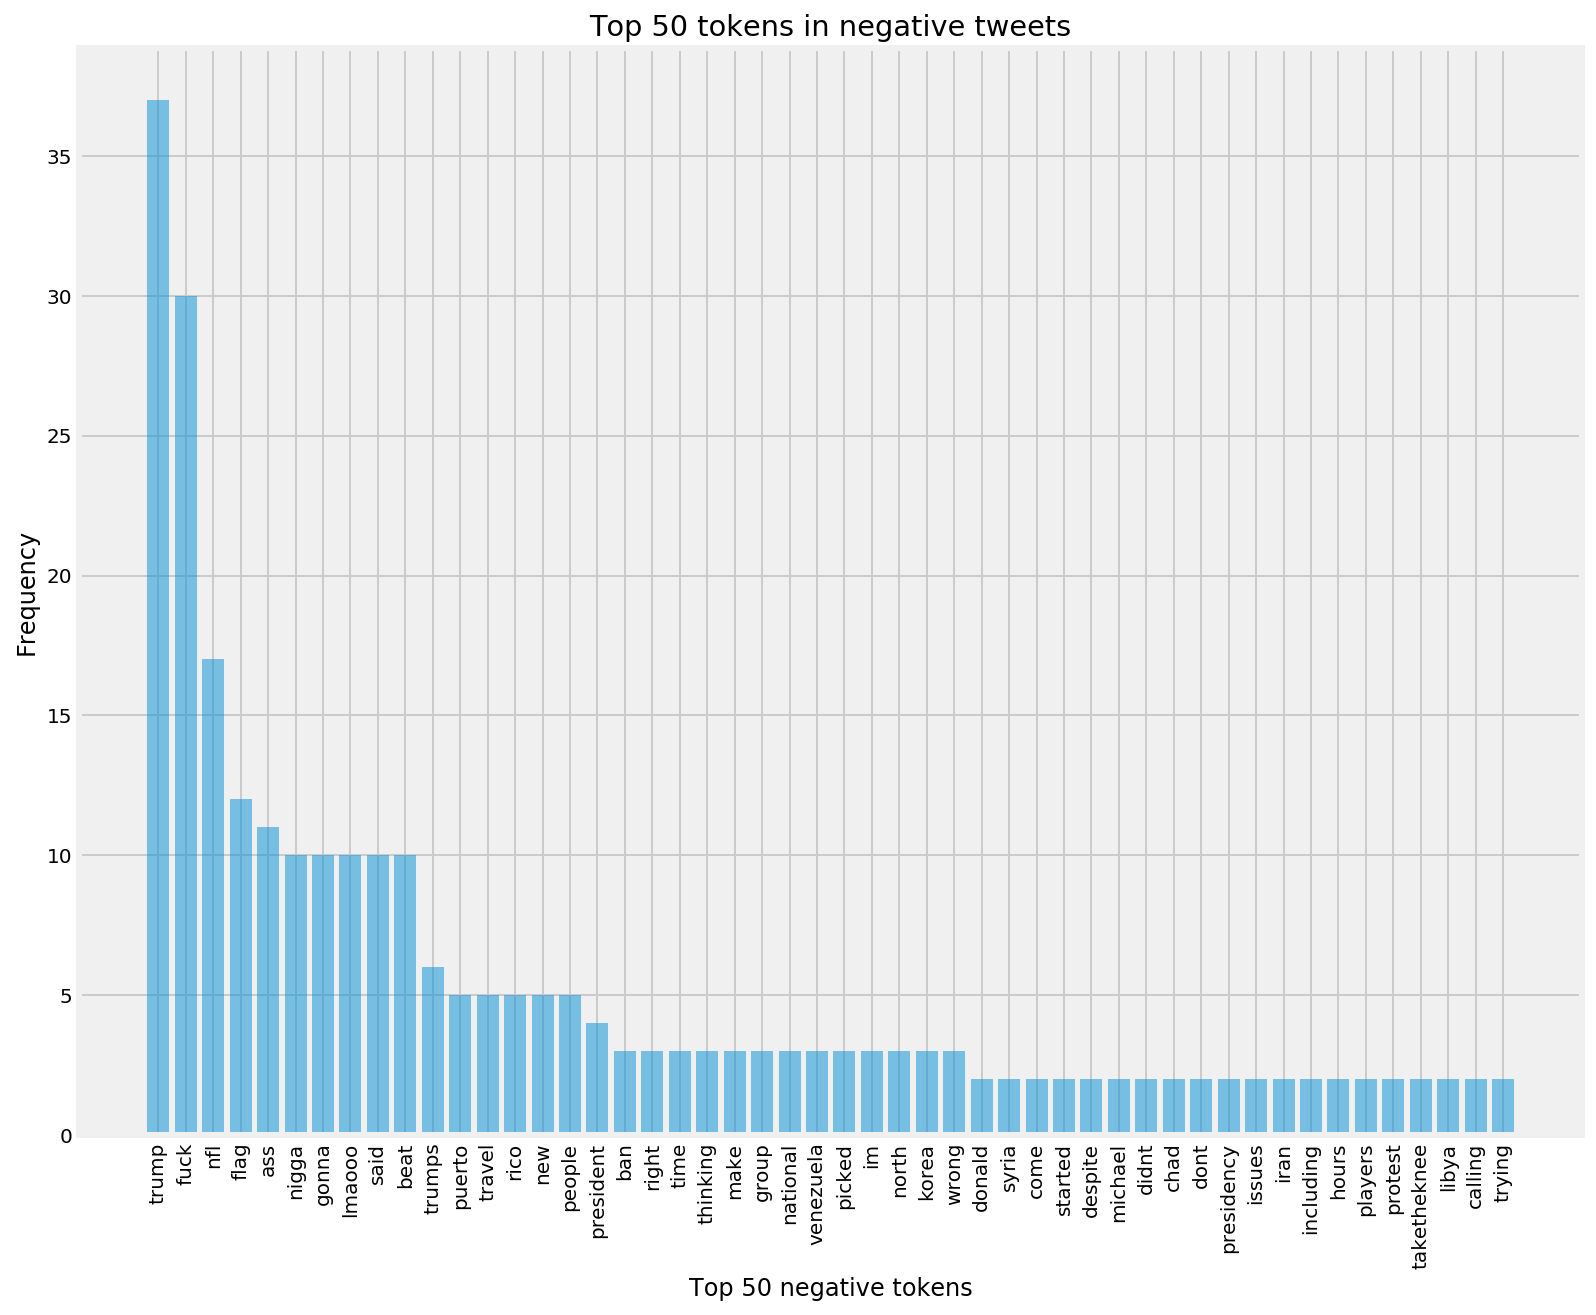

In [134]:

y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

Text(0.5,1,'Negative Frequency vs Positive Frequency')

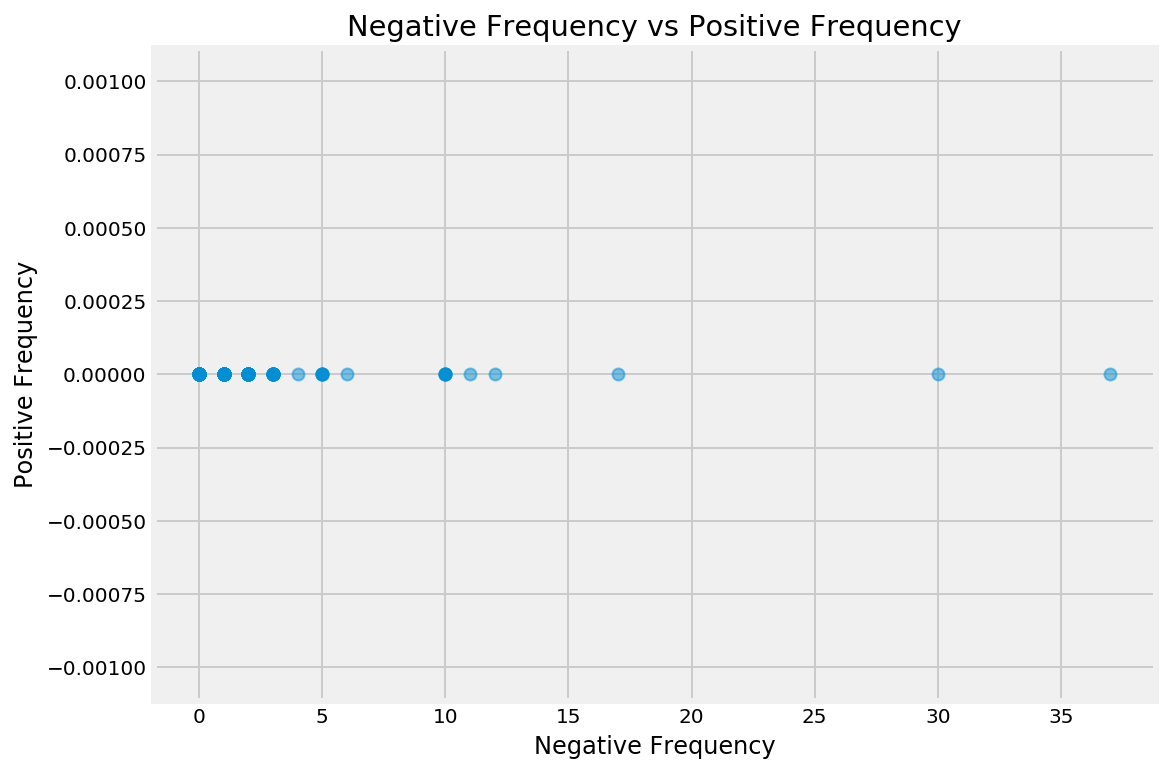

In [137]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

Most of the words are below 10,000 on both X-axis and Y-axis, and we cannot see meaningful relations between negative and positive frequency.

In order to come up with a meaningful metric which can characterise important tokens in each class, I borrowed a metric presented by Jason Kessler in PyData 2017 Seattle. In the talk, he presented a Python library called Scattertext. Even though I did not make use of the library, the metrics used in the Scattertext as a way of visualising text data are very useful in filtering meaningful tokens from the frequency data.

Intuitively, if a word appears more often in one class compared to another, this can be a good measure of how much the word is meaningful to characterise the class. In the below code I named it as 'pos_rate', and as you can see from the calculation of the code, this is defined as 



In [138]:

term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
term_freq_df2.sort_values(by='pos_rate', ascending=False).iloc[:10]

,negative,positive,total,pos_rate
abc,1,0,1,0.0
pull,1,0,1,0.0
read,1,0,1,0.0
reply,1,0,1,0.0
resort,1,0,1,0.0
restrict,1,0,1,0.0
restrictions,1,0,1,0.0
retweet,1,0,1,0.0
rico,5,0,5,0.0
right,3,0,3,0.0


Words with highest pos_rate have zero frequency in the negative tweets, but overall frequency of these words are too low to think of it as a guideline for positive tweets.

Another metric is the frequency a words occurs in the class. This is defined as 


In [139]:
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
term_freq_df2.sort_values(by='pos_freq_pct', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct
abc,1,0,1,0.0,NaN
ability,0,0,0,NaN,NaN
abt,2,0,2,0.0,NaN
accusing,1,0,1,0.0,NaN
act,1,0,1,0.0,NaN
actually,1,0,1,0.0,NaN
administration,2,0,2,0.0,NaN
affected,1,0,1,0.0,NaN
africa,0,0,0,NaN,NaN
agenda,1,0,1,0.0,NaN


But since pos_freq_pct is just the frequency scaled over the total sum of the frequency, the rank of pos_freq_pct is exactly same as just the positive frequency.

What we can do now is to combine pos_rate, pos_freq_pct together to come up with a metric which reflects both pos_rate and pos_freq_pct. Even though both of these can take a value ranging from 0 to 1, pos_rate has much wider range actually spanning from 0 to 1, while all the pos_freq_pct values are squashed within the range smaller than 0.015. If we average these two numbers, pos_rate will be too dominant, and will not reflect both metrics effectively.

So here we use harmonic mean instead of arithmetic mean. "Since the harmonic mean of a list of numbers tends strongly toward the least elements of the list, it tends (compared to the arithmetic mean) to mitigate the impact of large outliers and aggravate the impact of small ones." The harmonic mean H of the positive real number x1,x2,...xn is defined as 
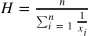

In [141]:

from scipy.stats import hmean

term_freq_df2['pos_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']])
                                                                   if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 
                                                                   else 0), axis=1)                                                        
term_freq_df2.sort_values(by='pos_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean
abc,1,0,1,0.0,NaN,0
ability,0,0,0,NaN,NaN,0
rico,5,0,5,0.0,NaN,0
retweet,1,0,1,0.0,NaN,0
restrictions,1,0,1,0.0,NaN,0
restrict,1,0,1,0.0,NaN,0
resort,1,0,1,0.0,NaN,0
reply,1,0,1,0.0,NaN,0
refused,0,0,0,NaN,NaN,0
real,0,0,0,NaN,NaN,0


The harmonic mean rank seems like the same as pos_freq_pct. By calculating the harmonic mean, the impact of small value (in this case, pos_freq_pct) is too aggravated and ended up dominating the mean value. This is again exactly same as just the frequency value rank and doesn't provide a meaningful result.

What we can try next is to get the CDF (Cumulative Distribution Function) value of both pos_rate and pos_freq_pct. CDF can be explained as "distribution function of X, evaluated at x, is the probability that X will take a value less than or equal to x". By calculating CDF value, we can see where the value of either pos_rate or pos_freq_pct lies in the distribution in terms of cumulative manner. In the below result of the code, we can see a word "welcome" with pos_rate_normcdf of 0.995625, and pos_freq_pct_normcdf of 0.999354. This means roughly 99.56% of the tokens will take a pos_rate value less than or equal to 0.91535, and 99.99% will take a pos_freq_pct value less than or equal to 0.001521.

Next, we calculate a harmonic mean of these two CDF values, as we did earlier. By calculating the harmonic mean, we can see that pos_normcdf_hmean metric provides a more meaningful measure of how important a word is within the class.

Text(0.5,1,'neg_hmean vs pos_hmean')

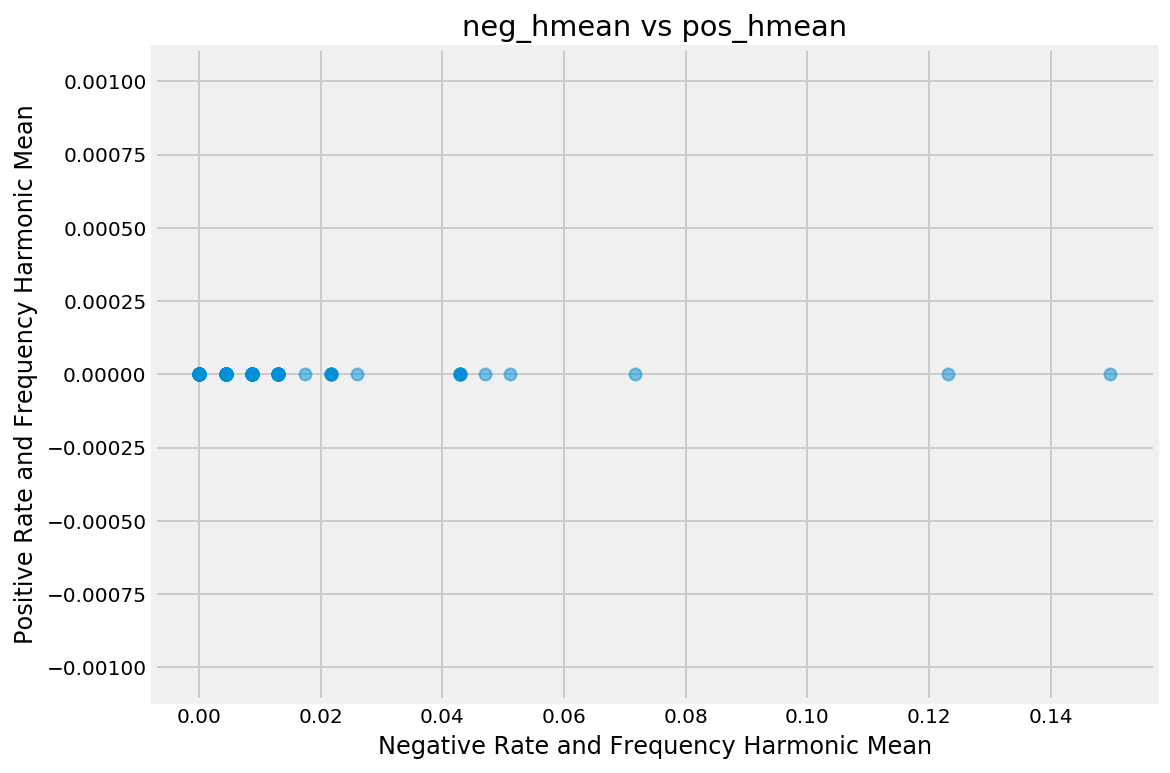

In [144]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency Harmonic Mean')
plt.xlabel('Negative Rate and Frequency Harmonic Mean')
plt.title('neg_hmean vs pos_hmean')

# Modelling

In [52]:
x = df.text
y = df.sentiment

In [53]:
from sklearn.cross_validation import train_test_split
SEED = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

C:\Users\pragn\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [54]:
print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train),
                                                                             (len(x_train[y_train == 0]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == 1]) / (len(x_train)*1.))*100))
print("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_validation),
                                                                             (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,
                                                                            (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test),
                                                                             (len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 1]) / (len(x_test)*1.))*100))

Train set has total 1568000 entries with 49.99% negative, 50.01% positive
Validation set has total 16000 entries with 50.68% negative, 49.33% positive
Test set has total 16000 entries with 50.55% negative, 49.45% positive


When comparing various machine learning algorithms, baseline provides a point of reference to compare. The most popular baseline is the Zero Rule (ZeroR). ZeroR classifier simply predicts the majority category (class). Although there is no predictability power in ZeroR, it is useful for determining a baseline performance as a benchmark for other classification methods. As you can see from the above validation set class division, the majority class is negative with 50.68%, which means if a classifier predicts negative for every validation data, it will get 50.68% accuracy.
Another baseline I wanted to compare the validation results with is TextBlob. TextBlob is a python library for processing textual data. Apart from other useful tools such as POS tagging, n-gram, The package has built-in sentiment classification. This is a so-called out-of-the-box sentiment analysis tool, and in addition to the null accuracy, I will also keep in mind of the accuracy I get from TextBlob sentiment analysis to see how my model is performing.

In [61]:
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
%%time
tbresult = [TextBlob(i).sentiment.polarity for i in x_validation]
tbpred = [0 if n < 0 else 1 for n in tbresult]

Wall time: 2.86 s


In [63]:
conmat = np.array(confusion_matrix(y_validation, tbpred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['positive', 'negative'],
                         columns=['predicted_positive','predicted_negative'])
print ("Accuracy Score: {0:.2f}%".format(accuracy_score(y_validation, tbpred)*100))
print ("-"*80)
print ("Confusion Matrix\n")
print (confusion)
print ("-"*80)
print ("Classification Report\n")
print (classification_report(y_validation, tbpred))

Accuracy Score: 60.77%
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_positive  predicted_negative
positive                7067                 825
negative                5451                2657
--------------------------------------------------------------------------------
Classification Report

             precision    recall  f1-score   support

          0       0.76      0.33      0.46      8108
          1       0.56      0.90      0.69      7892

avg / total       0.67      0.61      0.57     16000



In [64]:
conmat

array([[7067,  825],
       [5451, 2657]], dtype=int64)

If we want to use text in machine learning algorithms, we’ll have to convert them to a numerical representation. One of the methods is called bag-of-words approach. The bag of words model ignores grammar and order of words. Once we have a corpus (text data) then first, a list of vocabulary is created based on the entire corpus. Then each document or data entry is represented as numerical vectors based on the vocabulary built from the corpora.


With count vectorizer, we merely count the appearance of the words in each text. For example, let’s say we have 3 documents in a corpus: “I love dogs”, “I hate dogs and knitting”, “Knitting is my hobby and my passion”. If we build vocabulary from these three sentences and represent each document as count vectors, it will look like below pictures.


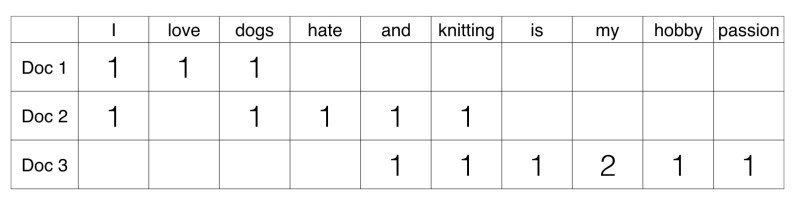


But if the size of a corpus gets big, the number of vocabulary gets too big to process. With my 1.5 million tweets, if I build vocabulary without limiting the number of vocabulary, I will have more than 260,000 vocabularies. This means that the shape of training data will be around 1,500,000 x 260,000, this sounds too big to train various different models with. So I decided to limit the number of vocabularies, but I also wanted to see how the performance varies depending on the number of vocabularies.


Another thing I wanted to explore is stop words. Stop Words are words which do not contain important significance, such as “the”, “of”, etc. It is often assumed that removing stop words is a necessary step, and will improve the model performance. But I wanted to see for myself if this is really the case. So I ran the same test with and without stop words and compared the result. In addition, I also defined my custom stop words list, which contains top 10 most frequent words in the corpora: “to”, “the”, “my”, “it”, “and”, “you”, “not”, “is”, “in”, “for”.


A model I chose to evaluate different count vectors is logistic regression. It is one of linear models, so computationally scalable to big data, compared to models like KNN or random forest. And once I have the optimal number of features and make a decision on whether to remove stop words or not, then I will try different models with the chosen number of vocabularies’ count vectors.

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

In [66]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

In [74]:
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(1000,10000,1000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print((classifier))
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [75]:
%%time
print("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_wosw = nfeature_accuracy_checker(stop_words='english')

RESULT FOR UNIGRAM WITHOUT STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 1000 features
null accuracy: 50.68%
accuracy score: 74.04%
model is 23.37% more accurate than null accuracy
train and test time: 38.01s
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.68%
accuracy score: 75.75%
model is 25.07% more accurate than null accuracy
train and test time: 46.70s
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.68%
accuracy score: 76.36%
model is 25.69% more accurate than null accuracy
train and test time: 56.47s
----------------------------------------------------------

In [76]:
%%time
print("RESULT FOR UNIGRAM WITH STOP WORDS\n")
feature_result_ug = nfeature_accuracy_checker()

RESULT FOR UNIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 1000 features
null accuracy: 50.68%
accuracy score: 76.07%
model is 25.39% more accurate than null accuracy
train and test time: 62.42s
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.68%
accuracy score: 77.54%
model is 26.86% more accurate than null accuracy
train and test time: 72.02s
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.68%
accuracy score: 78.34%
model is 27.66% more accurate than null accuracy
train and test time: 79.06s
-------------------------------------------------------------

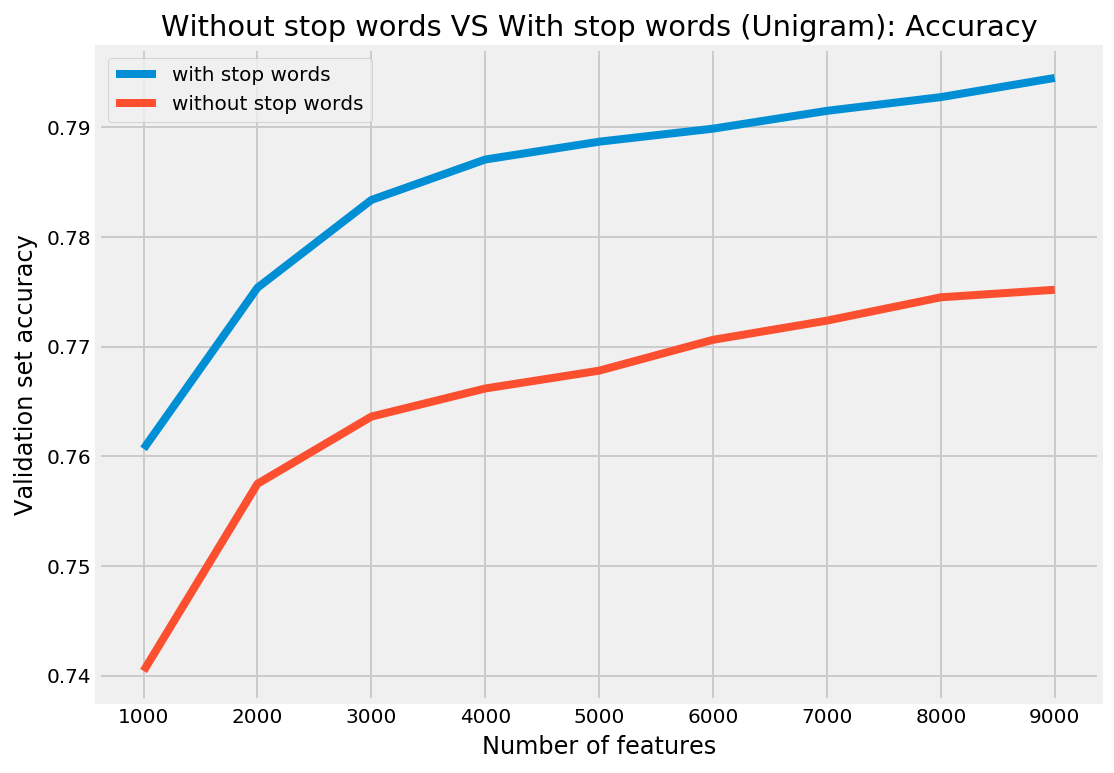

In [77]:
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wosw = pd.DataFrame(feature_result_wosw,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='with stop words')
plt.plot(nfeatures_plot_ug_wosw.nfeatures, nfeatures_plot_ug_wosw.validation_accuracy,label='without stop words')
plt.title("Without stop words VS With stop words (Unigram): Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [78]:
%%time
print("RESULT FOR BIGRAM WITH STOP WORDS\n")
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2))

RESULT FOR BIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 1000 features
null accuracy: 50.68%
accuracy score: 76.00%
model is 25.32% more accurate than null accuracy
train and test time: 148.32s
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.68%
accuracy score: 77.67%
model is 26.99% more accurate than null accuracy
train and test time: 249.57s
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.68%
accuracy score: 78.54%
model is 27.87% more accurate than null accuracy
train and test time: 287.33s
-----------------------------------------------------------

In [79]:
%%time
print("RESULT FOR TRIGRAM WITH STOP WORDS\n")
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3))

RESULT FOR TRIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 1000 features
null accuracy: 50.68%
accuracy score: 75.95%
model is 25.27% more accurate than null accuracy
train and test time: 1807.39s
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.68%
accuracy score: 77.64%
model is 26.97% more accurate than null accuracy
train and test time: 572.05s
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.68%
accuracy score: 78.50%
model is 27.82% more accurate than null accuracy
train and test time: 434.92s
---------------------------------------------------------

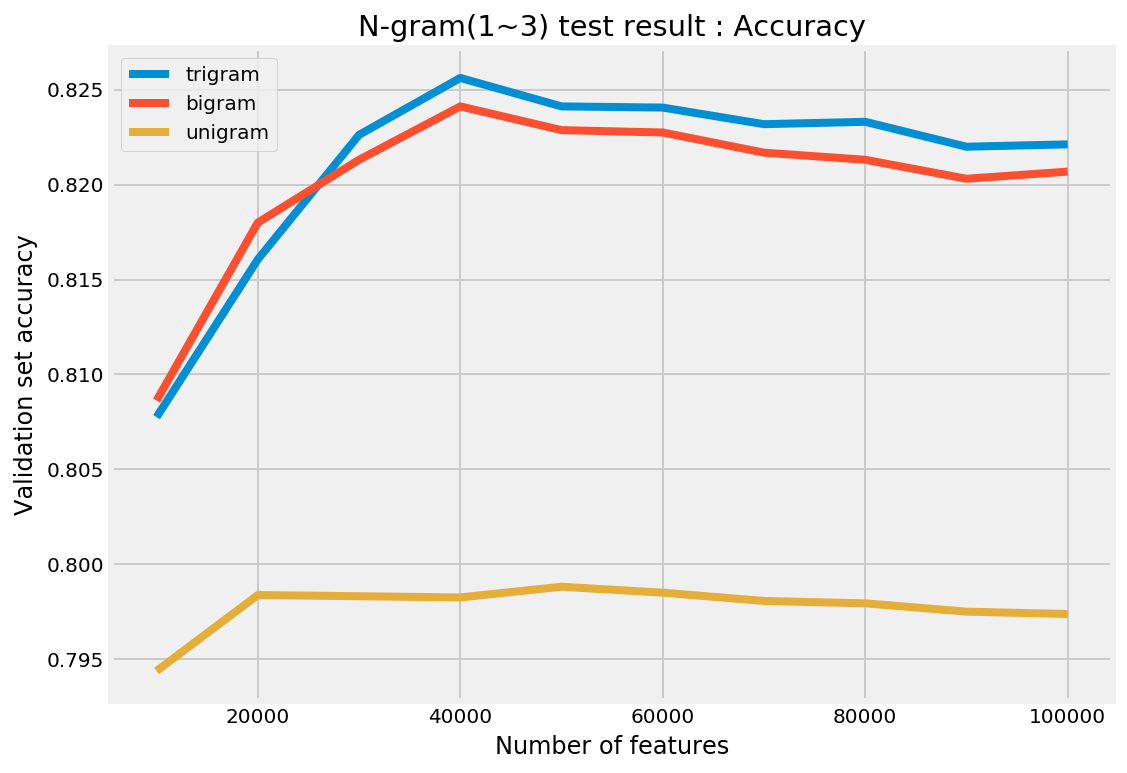

In [81]:
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [82]:
def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
    confusion = pd.DataFrame(conmat, index=['negative', 'positive'],
                         columns=['predicted_negative','predicted_positive'])
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("-"*80)
    print ("Confusion Matrix\n")
    print (confusion)
    print ("-"*80)
    print ("Classification Report\n")
    print (classification_report(y_test, y_pred, target_names=['negative','positive']))